<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Machine_Etymology/blob/main/3rd_day_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

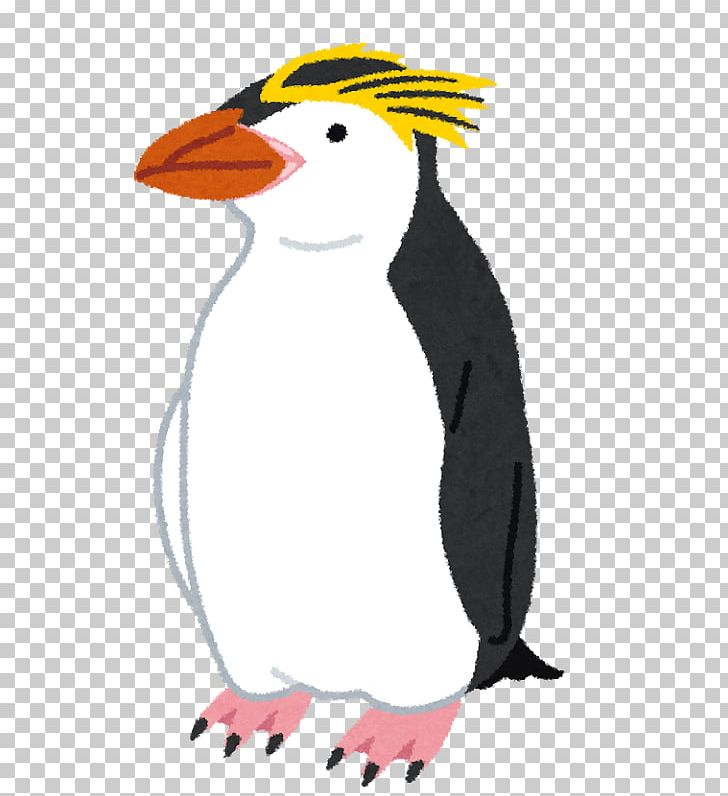

In [17]:
import pandas as pd
import numpy as nm

In [18]:
dataset = pd.read_csv('/content/penguins.csv')

print(dataset)

     rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
3        5     Adelie  Torgersen            36.7           19.3   
4        6     Adelie  Torgersen            39.3           20.6   
..     ...        ...        ...             ...            ...   
333    340  Chinstrap      Dream            55.8           19.8   
334    341  Chinstrap      Dream            43.5           18.1   
335    342  Chinstrap      Dream            49.6           18.2   
336    343  Chinstrap      Dream            50.8           19.0   
337    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g  Gender  year  
0                  181         3750    male  2007  
1                  186         3800  female  2007  
2                  195         3250  fe

In [19]:
dataset.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender,year
0,1,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,5,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,6,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [20]:
dataset.shape   # row , column

(338, 9)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              338 non-null    int64  
 1   species            338 non-null    object 
 2   island             338 non-null    object 
 3   bill_length_mm     338 non-null    float64
 4   bill_depth_mm      338 non-null    float64
 5   flipper_length_mm  338 non-null    int64  
 6   body_mass_g        338 non-null    int64  
 7   Gender             329 non-null    object 
 8   year               338 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 23.9+ KB


In [22]:
dataset ['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

### Lableing Island

In [23]:
dataset ['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

dataset['island'] = LabelEncoder().fit_transform(dataset['island'])

In [25]:
dataset ['island'].unique()

array([2, 0, 1])

#Data Spliting

In [26]:
dataset.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'Gender', 'year'],
      dtype='object')

In [27]:
X = dataset[['island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year']]

Y = dataset ['species']

In [28]:
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,2,39.1,18.7,181,3750,2007
1,2,39.5,17.4,186,3800,2007
2,2,40.3,18.0,195,3250,2007
3,2,36.7,19.3,193,3450,2007
4,2,39.3,20.6,190,3650,2007


In [30]:
Y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2 , random_state=0)

#Traning Phase

In [32]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier ( random_state=0)

rf.fit(X_train,Y_train)



RandomForestClassifier(random_state=0)

In [33]:
y_pred = rf.predict(X_test)

#Accuracy

In [35]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,y_pred)) # model prediction

1.0


#Project

In [39]:
df = pd.DataFrame({'island' : [0],'bill_length_mm' : [38.1],'bill_depth_mm' : [16.5],'flipper_length_mm': [196],'body_mass_g' : [3825],'year' : [2007] })

In [40]:
rf.predict(df)

array(['Adelie'], dtype=object)